Практическая работа №2. Задание 1.

In [66]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head(n=5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


1.1 Разбивка на обучающую выборку и выборку валидации

In [67]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2)



1.2 Стандартизация входных данных для повышения точности модели

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

1.3 Создание архитектуры нейронной сети

In [69]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, activation="relu", input_shape=X_train.shape[1:], name='input_dense'))
model.add(Dense(30, activation="relu", name='dense_1'))
model.add(Dense(1, activation='linear', name='dense_output'))

1.4 Компиляция нейронной сети

In [70]:
model.compile(loss="mean_squared_error", optimizer='sgd')
model.summary()
print(f'Используемый оптимизатор: {model.optimizer.name}')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_dense (Dense)         (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_output (Dense)        (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________
Используемый оптимизатор: SGD


1.5 Обучение нейронной сети

In [71]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_valid, y_valid), verbose=False)
# mse_test = model.evaluate(X_test, y_test)

1.6 Оценка критерия качества работы нейронной сети с помощью представления на графике

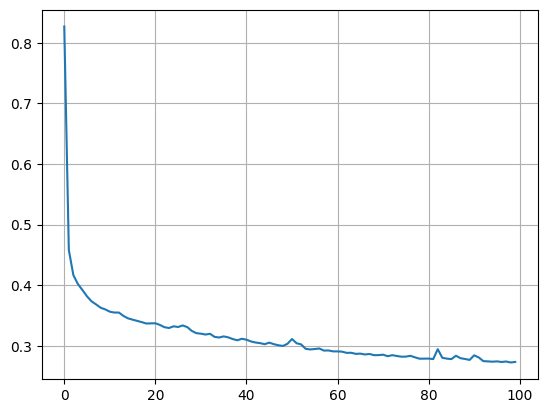

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

1.7 Оценка критерия качества работы нейронной сети на тестовой выборке

In [73]:
neural_loss = model.evaluate(X_test, y_test)
print(f'Критерий качества работы нейронной сети на тестовой выборке: {round(neural_loss, 4)}')


129/129 [==============================] - 0s 2ms/step - loss: 0.3085
Критерий качества работы нейронной сети на тестовой выборке: 0.3085


1.8 Предсказание на тестовых данных

In [74]:
X_new = X_test[:10]
Y_new = y_test[:10]
y_pred = model.predict(X_new)

for i in range(len(y_pred)):
  print(y_pred[i], Y_new[i])

1/1 [==============================] - 0s 56ms/step
[1.779305] 1.369
[2.6245399] 2.413
[1.5000299] 2.007
[0.7308595] 0.725
[3.527144] 4.6
[2.0680337] 1.2
[2.6333265] 2.47
[3.9138997] 3.369
[2.9351206] 3.397
[2.6451473] 2.656
